In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Remove columns with more than 40% null values

df = df.dropna(axis=1, thresh=600)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
# keep only numeric columns from df

df = df.select_dtypes(include=['int64', 'float64'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

# Exploración de datos

In [6]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/miguel.d.ferrusca/Documents/ironhack/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


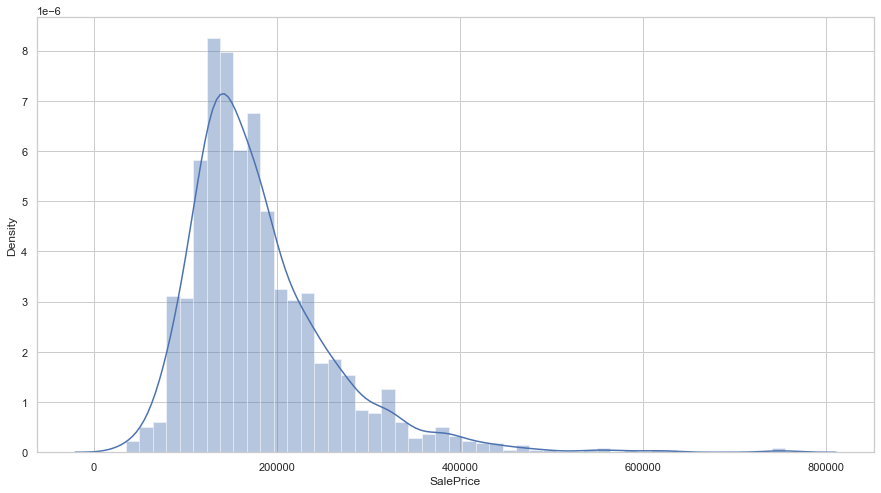

In [7]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")


sns.distplot(df.SalePrice)

plt.show()

/Users/miguel.d.ferrusca/Documents/ironhack/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

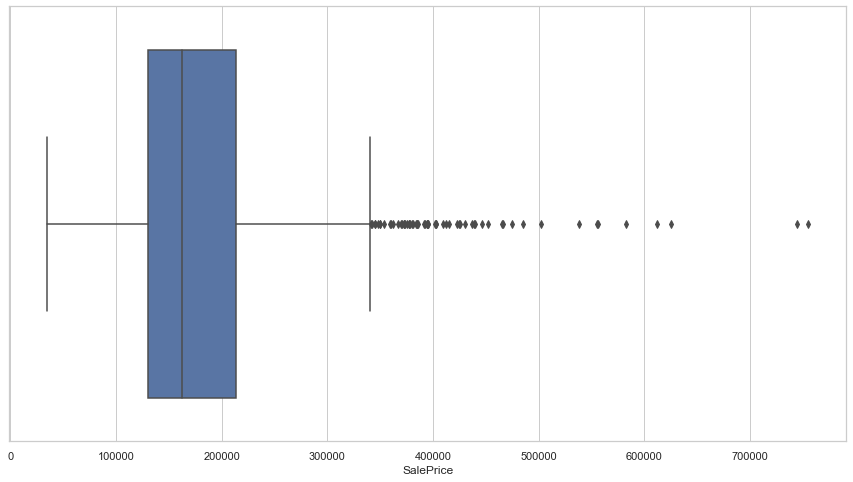

In [8]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")


sns.boxplot(df.SalePrice)

<AxesSubplot:>

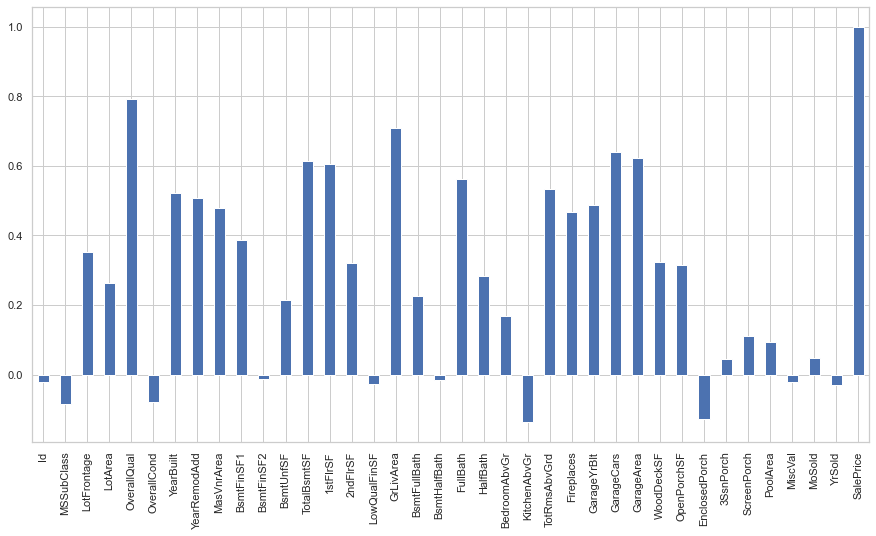

In [9]:
correlation = df.corr()

plt.figure(figsize=(15,8))

correlation.SalePrice.plot(kind='bar')

In [29]:
influencing_columns = correlation[['SalePrice']]

print(influencing_columns.shape)

influencing_columns = influencing_columns[influencing_columns['SalePrice']>.6]

influencing_columns.index

(7, 1)


Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

<AxesSubplot:>

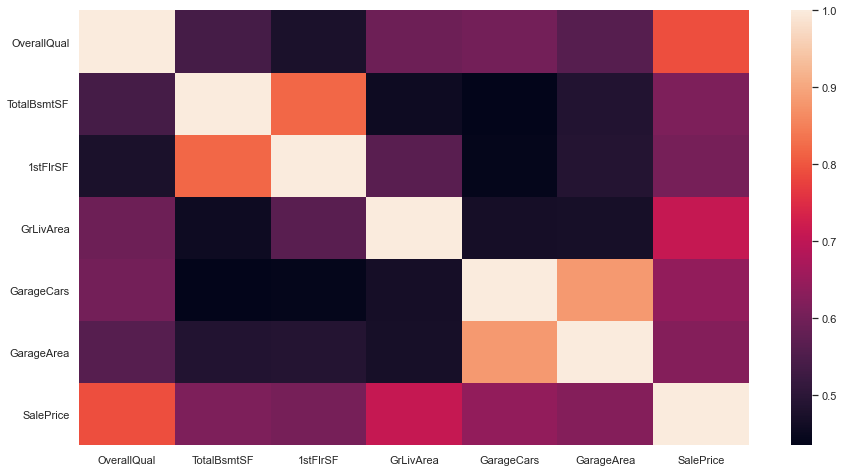

In [11]:
correlation = df.corr()

correlation = correlation[influencing_columns.index]

correlation = correlation.loc[influencing_columns.index]


plt.figure(figsize=(15,8))


sns.heatmap(correlation)

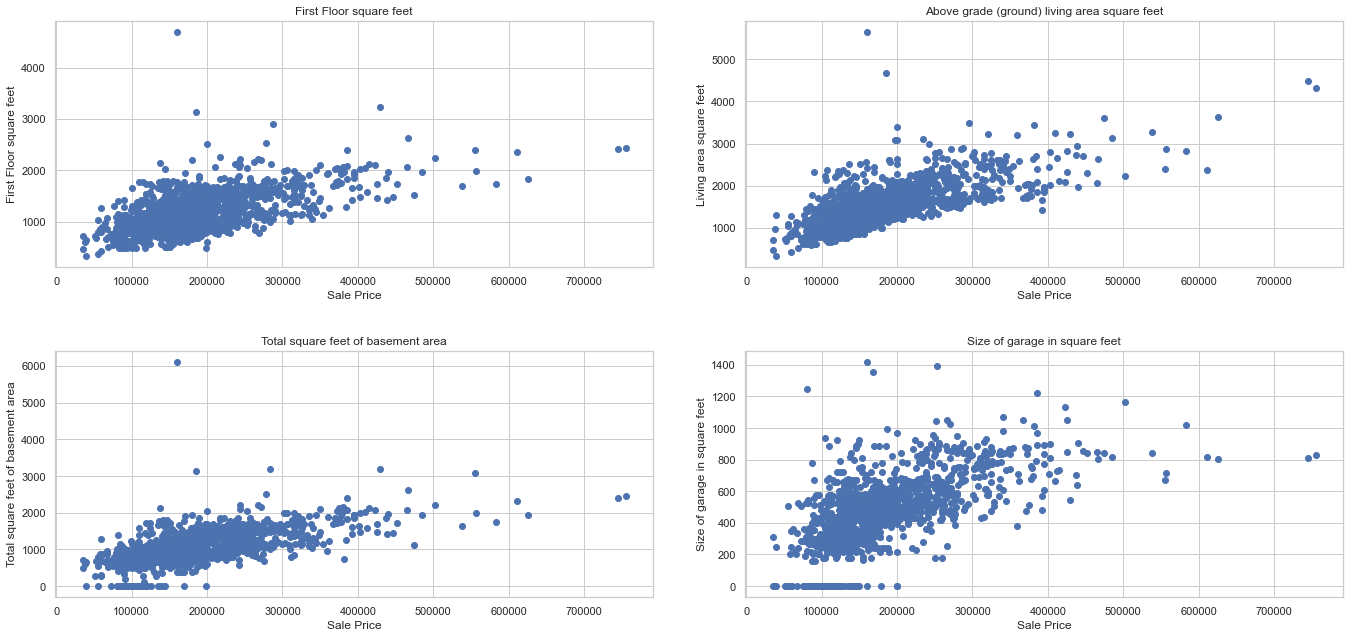

In [12]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(20,10))

fig.tight_layout(pad=5.0)


ax[0,0].scatter(df.SalePrice, df['1stFlrSF'])
ax[0,0].set_title('First Floor square feet')
ax[0,0].set_xlabel('Sale Price')
ax[0,0].set_ylabel('First Floor square feet')

ax[0,1].scatter(df.SalePrice, df.GrLivArea)
ax[0,1].set_title('Above grade (ground) living area square feet')
ax[0,1].set_xlabel('Sale Price')
ax[0,1].set_ylabel('Living area square feet')


ax[1,0].scatter(df.SalePrice, df.TotalBsmtSF)
ax[1,0].set_title('Total square feet of basement area')
ax[1,0].set_xlabel('Sale Price')
ax[1,0].set_ylabel('Total square feet of basement area')


ax[1,1].scatter(df.SalePrice, df.GarageArea)
ax[1,1].set_title('Size of garage in square feet')
ax[1,1].set_xlabel('Sale Price')
ax[1,1].set_ylabel('Size of garage in square feet')


plt.show()

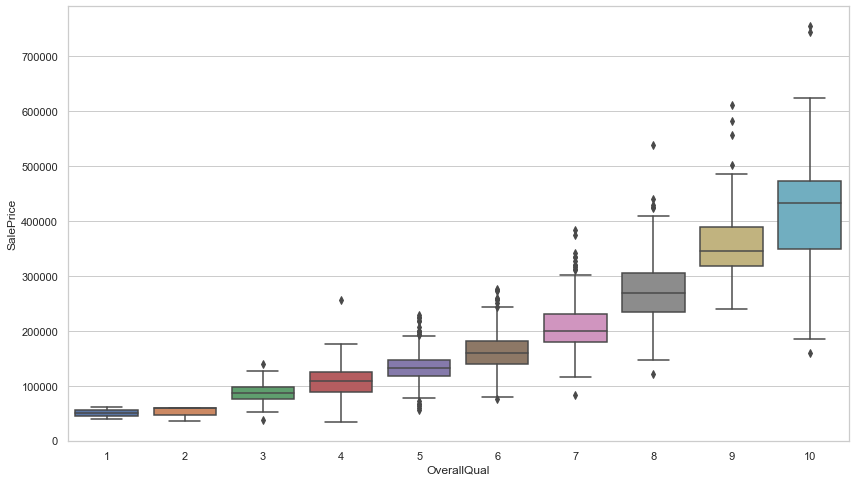

In [13]:
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=data)

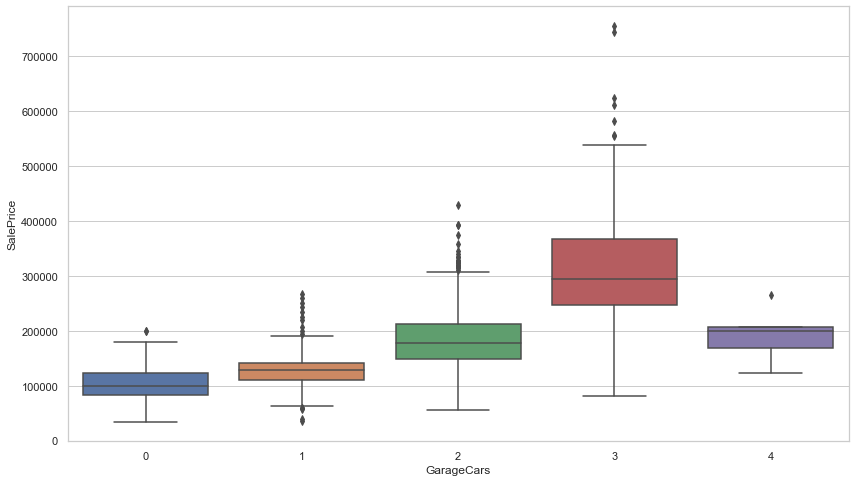

In [14]:
data = pd.concat([df['SalePrice'], df['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x="GarageCars", y="SalePrice", data=data)

# Reducing meaningful columns with PCA

In [15]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
scaler = StandardScaler()
norm_data =  scaler.fit_transform(df)

In [18]:
df_norm = pd.DataFrame(norm_data, index = df.index, columns = df.columns).fillna(0).astype('float64')
df_norm.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730865,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-1.728492,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-1.726120,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-1.723747,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,-1.721374,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843


In [19]:
pca = PCA()
pca.fit(df_norm)

PCA()

In [20]:
pca.explained_variance_ratio_

array([2.07932346e-01, 8.48505599e-02, 6.68767599e-02, 5.34711858e-02,
       3.94844517e-02, 3.15809361e-02, 3.05766385e-02, 3.00101675e-02,
       2.90680039e-02, 2.89143728e-02, 2.83985501e-02, 2.74273845e-02,
       2.68959671e-02, 2.64865879e-02, 2.52785012e-02, 2.38909322e-02,
       2.30434565e-02, 2.18359574e-02, 2.15054194e-02, 2.07579660e-02,
       1.95398871e-02, 1.76925222e-02, 1.64407634e-02, 1.54654462e-02,
       1.34060410e-02, 1.07922531e-02, 1.04940347e-02, 8.48667849e-03,
       7.69280677e-03, 6.95384542e-03, 6.18425396e-03, 5.14192906e-03,
       4.00717971e-03, 3.72075716e-03, 3.22320913e-03, 2.47224806e-03,
       4.10074247e-32, 1.22480985e-33])

Text(0, 0.5, 'Varianza explicada acumulada')

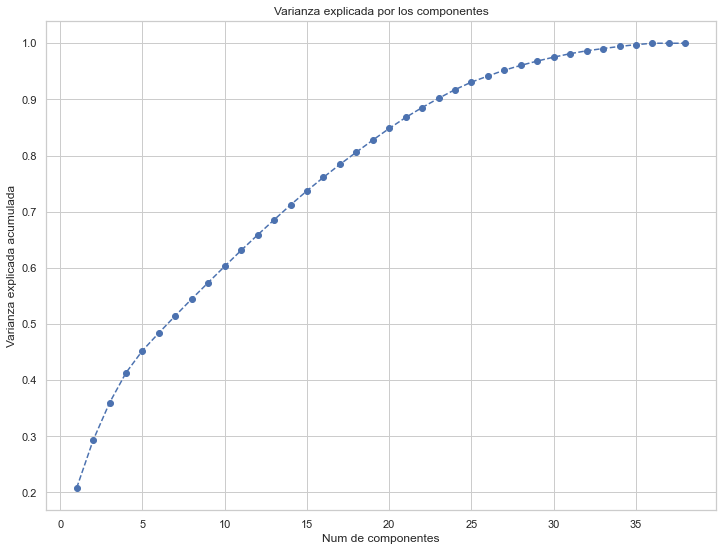

In [21]:
plt.figure(figsize=(12,9))
plt.plot(range(1,39),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle = '--')
plt.title("Varianza explicada por los componentes")
plt.xlabel("Num de componentes")
plt.ylabel("Varianza explicada acumulada")

In [22]:
pca = PCA(n_components = 18)
pca.fit(df_norm)

PCA(n_components=18)

In [23]:
df_transform = pca.transform(df_norm)

In [24]:
cols = ['C' + str(x) for x in range(1,19)]

cols

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18']

In [25]:
data_pca = pd.DataFrame(df_transform, index = df_norm.index, columns =cols)
data_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18
0,1.504617,0.376260,-1.647342,-1.976751,0.500435,1.228613,-0.500712,-0.497661,-0.538207,0.119074,-1.217543,0.826248,0.402381,0.275400,0.231099,-1.131847,-1.430291,0.258640
1,-0.017001,-1.106243,1.232418,-0.005961,-1.818256,0.086654,3.752699,-0.158467,0.019139,-0.141419,-0.917031,-1.447880,1.640067,-0.007202,-0.816457,-1.054481,-0.830054,0.530735
2,1.741236,0.247660,-1.440498,-1.413148,-0.169008,-0.265873,-0.065574,-0.408684,-0.580715,0.215206,-0.997026,0.758129,-0.839691,0.612269,0.318385,-0.259073,-0.505823,0.878655
3,-0.496564,1.007971,0.835331,-0.127328,0.347734,0.491233,-1.483191,0.420048,-2.659308,0.526234,-1.028684,-1.864700,-0.394997,1.433953,2.824805,-1.292400,-0.524281,0.192655
4,4.447654,1.129773,-0.514087,-1.363997,-0.059898,-0.641699,0.619804,-0.565974,-0.835903,-0.372364,-0.770351,0.608845,-1.490625,0.603942,0.018073,-0.733142,-0.131044,1.402885


In [26]:
df_pca_comp = pd.DataFrame( data = pca.components_,
                           columns = df_norm.columns.values,
                           index = cols)
df_pca_comp.shape

(18, 38)

<AxesSubplot:>

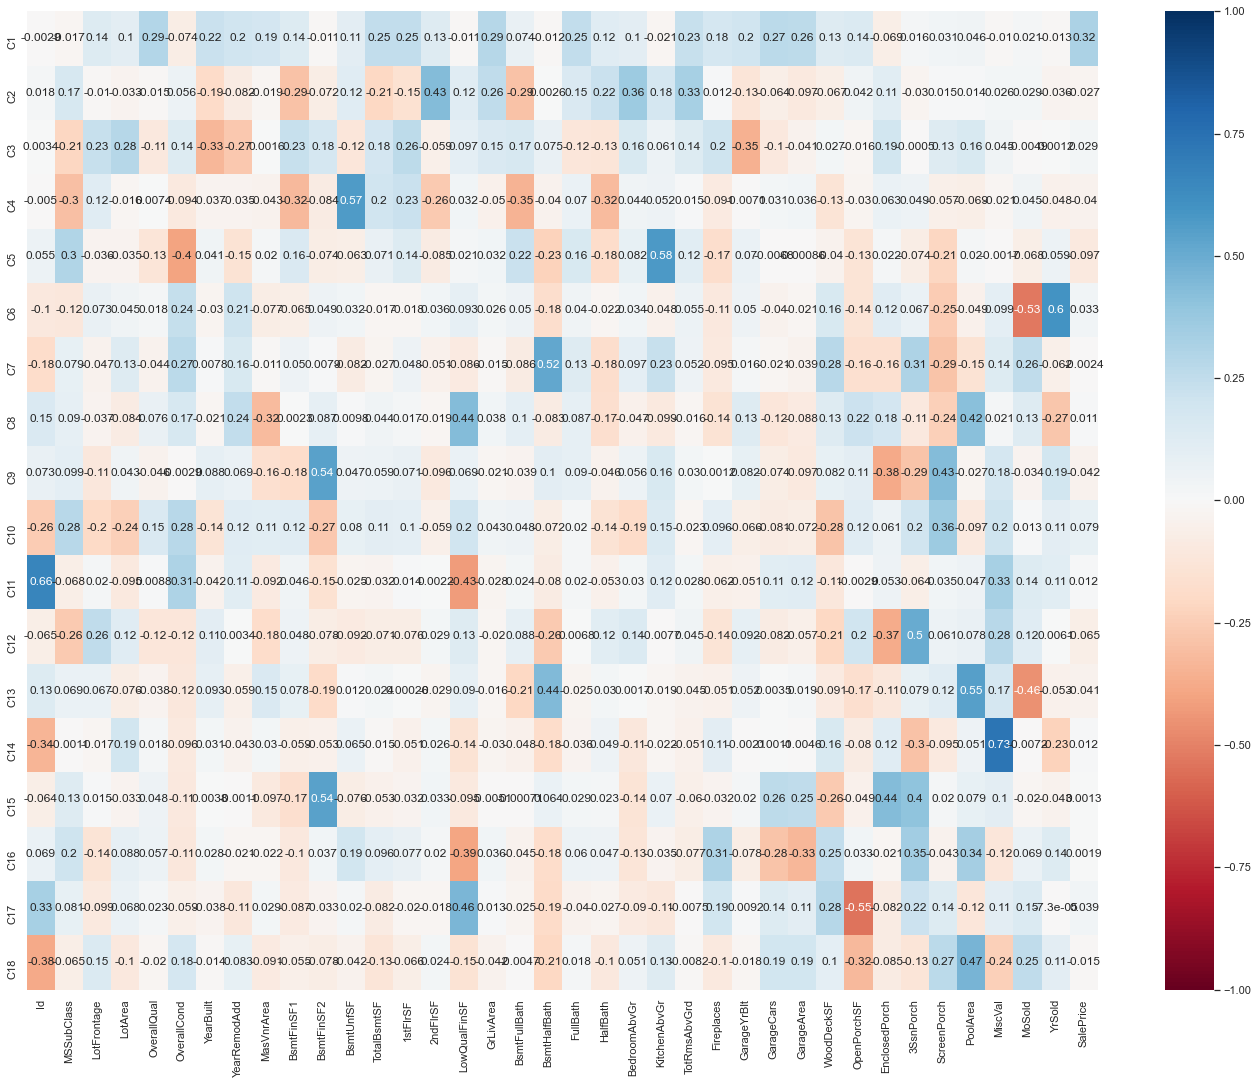

In [27]:
plt.figure(figsize=(24,18))

sns.heatmap(df_pca_comp, vmin=-1, vmax=1,cmap='RdBu',annot=True)

# Regresion lineal

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [82]:
# selecting columns with highest corr with sales price. Number based on PCA.

corr = df.corr()

corr['AbsSalePrice'] = corr.SalePrice.abs()

corr = corr.sort_values(by='AbsSalePrice', ascending=False)

corr = corr.drop('AbsSalePrice', axis=1)

pca_columns = corr[:19].index

reduced_df = df[pca_columns].fillna(0).astype('float64')

reduced_df.shape

(1460, 19)

In [83]:
# Setting dependent and independent variables

x = reduced_df.drop('SalePrice', axis=1)

y = reduced_df.SalePrice

In [84]:
# Creating train and test sets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .1, random_state = 77)

In [85]:
# Building linear regression

linreg = LinearRegression()

linreg.fit(x_train, y_train)

LinearRegression()

In [89]:
# Getting coefficients for each car

coeff_df = pd.DataFrame(linreg.coef_, x.columns, columns=['Coefficient'])

coeff_df

,Coefficient
OverallQual,19006.737025
GrLivArea,23.913860
GarageCars,14893.371848
GarageArea,11.755426
TotalBsmtSF,10.105292
1stFlrSF,22.410048
FullBath,-2316.111320
TotRmsAbvGrd,752.728943
YearBuilt,161.336852
YearRemodAdd,289.012617


In [90]:
# Getting model scores

train_score = linreg.score(x_train, y_train)
test_score = linreg.score(x_test, y_test)

print(train_score)
print(test_score)

0.7878956341331742
0.8377085829930866


In [91]:
# Testing model with test set

predicted = linreg.predict(x_test)

df_pred = pd.DataFrame ({'Actual':y_test, 'Predicted':predicted})

df_pred

,Actual,Predicted
705,55000.0,61710.993031
38,109000.0,123589.027866
761,100000.0,125800.035209
104,169500.0,195726.535352
346,151500.0,130002.486820
...,...,...
1273,177000.0,168792.211345
760,127500.0,116580.570225
770,134900.0,129201.623414
40,160000.0,170926.768706


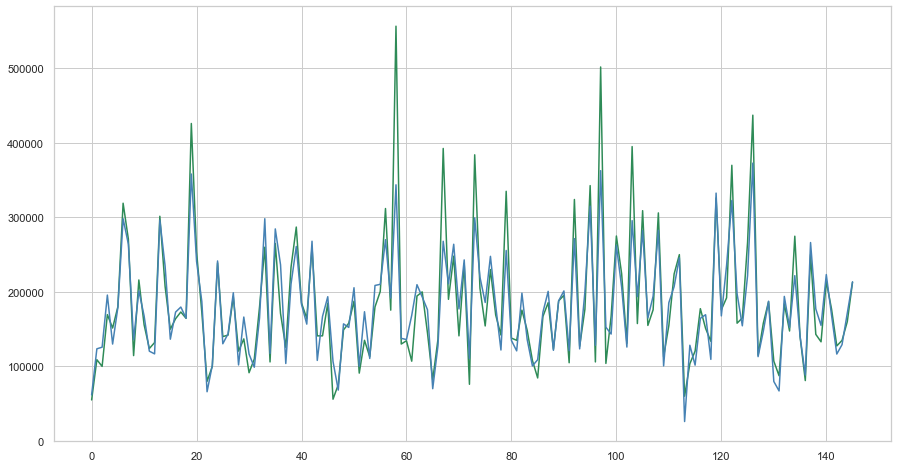

In [94]:
# Plotting test results

df_pred.reset_index(inplace=True)

plt.figure(figsize=(15,8))

plt.plot(df_pred.Actual, color='seagreen', label='Actual')
plt.plot(df_pred.Predicted, color='steelblue', label='Predicted')

In [95]:
# getting model errors

from sklearn import metrics


In [97]:
mean_sqr_err = metrics.mean_squared_error(y_test, predicted)

mean_abs_err = metrics.mean_absolute_error(y_test, predicted)

print("Mean square error: ", mean_sqr_err)
print("Mean absolute error: ", mean_abs_err)

Mean square error:  1233509177.25323
Mean absolute error:  22589.71456788959


# Ridge regression

In [98]:
# Creating ridge

rr = Ridge()
rr.fit(x_train, y_train)

Ridge()

In [99]:
# trainning ridge

rr100 = Ridge(alpha=100)
rr100.fit(x_train, y_train)

Ridge(alpha=100)

In [100]:
# getting ridge scores

ridge_train_score = rr.score(x_train, y_train)
ridge_test_score = rr.score(x_test, y_test)
ridge100_train_score = rr100.score(x_train, y_train)
ridge100_test_score = rr100.score(x_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", ridge_train_score)
print("ridge regression test score low alpha:", ridge_test_score)
print("ridge regression train score high alpha:", ridge100_train_score)
print("ridge regression test score high alpha:", ridge100_test_score)

linear regression train score: 0.7878956341331742
linear regression test score: 0.8377085829930866
ridge regression train score low alpha: 0.7878953696311731
ridge regression test score low alpha: 0.8377372370649023
ridge regression train score high alpha: 0.7867860639516311
ridge regression test score high alpha: 0.8381358871890203


In [108]:
# testing ridge against test sets

predicted_ridge = rr100.predict(x_test)
predicted_ridge = pd.DataFrame({'Actual':y_test, 'Predicted':predicted_ridge})
predicted_ridge

,Actual,Predicted
705,55000.0,61915.755141
38,109000.0,125474.754728
761,100000.0,122633.019957
104,169500.0,192932.019722
346,151500.0,131034.260348
...,...,...
1273,177000.0,170016.257463
760,127500.0,116207.696479
770,134900.0,129698.155888
40,160000.0,168136.130939


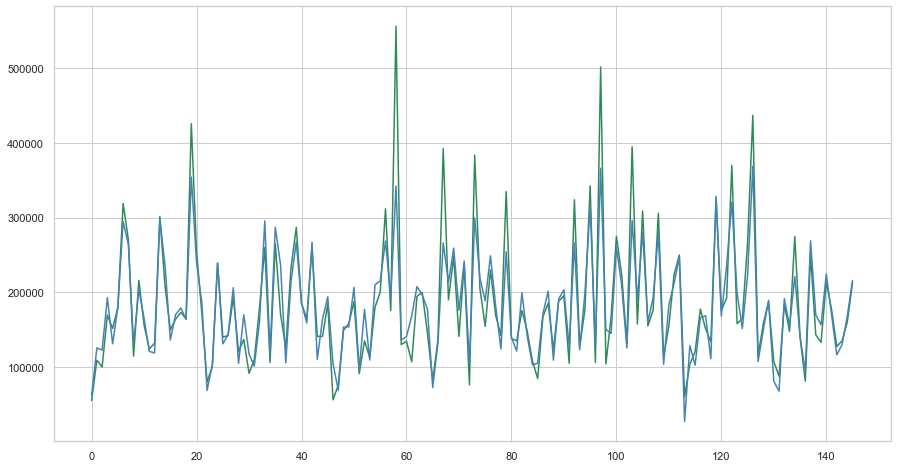

In [109]:
# Plotting test results

predicted_ridge.reset_index(inplace=True)

plt.figure(figsize=(15,8))

plt.plot(predicted_ridge.Actual, color='seagreen', label='Actual')
plt.plot(predicted_ridge.Predicted, color='steelblue', label='Predicted')

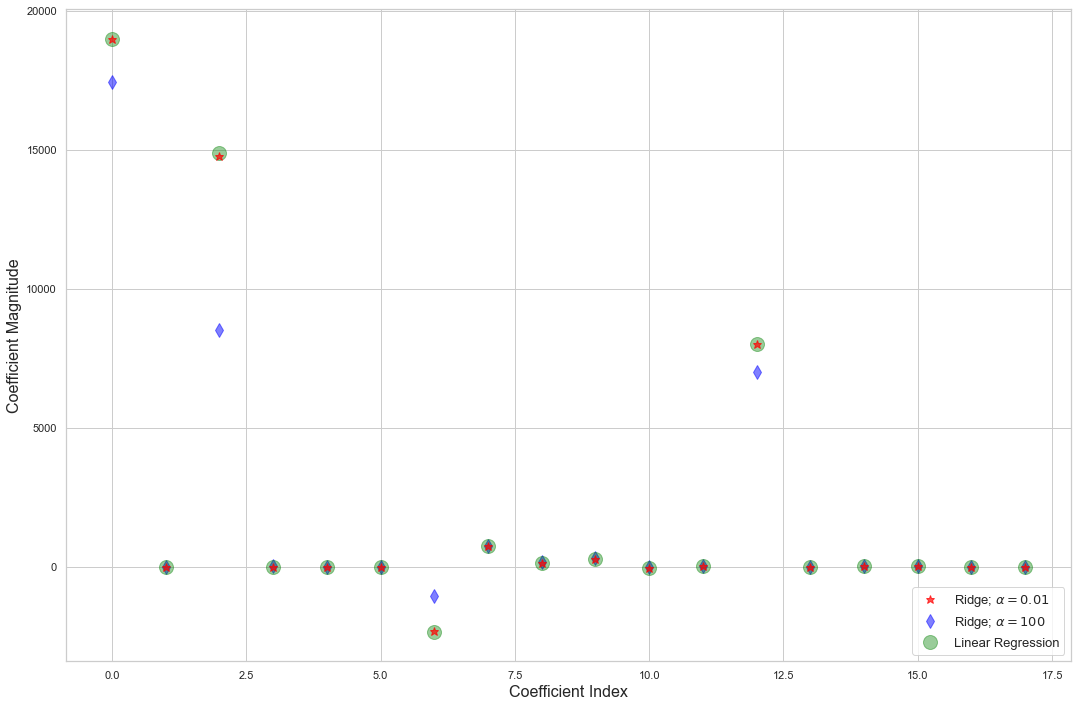

In [107]:
fig = plt.figure(facecolor='w',figsize=(18, 12))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=9,\
         color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=10,\
         color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(linreg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=14,\
         color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()